In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline
from desitarget import QA
import numpy as np
from scipy.interpolate import interp1d

In [2]:
bf = "../../data/brick-info-dr3.fits"
flucmap = QA.fluc_map(bf)
n_points = len(flucmap)
integrated = np.linspace(0.0,1.0, n_points)

ebv = flucmap['EBV'].copy()
ebv.sort()

depth_g = flucmap['DEPTH_G'].copy()
depth_g.sort()

depth_r = flucmap['DEPTH_R'].copy()
depth_r.sort()

depth_z = flucmap['DEPTH_Z'].copy()
depth_z.sort()

fraction_ebv = np.array([0.0, 0.02, 0.1, 0.3, 0.5, 0.8, 0.9, 0.97, 0.99, 1.0])
sample_ebv = np.int_(fraction_ebv * (n_points-1))

fraction_depth_g = np.array([0.0, 0.01, 0.02, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0])
sample_depth_g = np.int_(fraction_depth_g * (n_points-1))


fraction_depth_r = np.array([0.0, 0.01, 0.02, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0])
sample_depth_r = np.int_(fraction_depth_r * (n_points-1))

fraction_depth_z = np.array([0.0, 0.01, 0.03, 0.08, 0.2, 0.3, 0.7, 0.9, 0.99, 1.0])
sample_depth_z = np.int_(fraction_depth_z * (n_points-1))

print ebv[sample_ebv]
print depth_g[sample_depth_g]
print depth_r[sample_depth_r]
print depth_z[sample_depth_z]

[ 0.008758    0.01870997  0.02296527  0.02915531  0.03742408  0.05848215
  0.07245968  0.10044503  0.13744652  0.25484765]
[ 12.91721153  18.95317841  20.64332008  23.78604698  24.29093361
  24.4658947   24.55436325  24.61874771  24.73129845  24.94996071]
[ 12.91556168  18.6766777   20.29519463  23.41814804  23.85244179
  24.10131454  24.23338318  24.34066582  24.53495026  24.94865227]
[ 13.09378147  21.06531525  22.42395782  22.77471352  22.96237755
  23.04913139  23.43119431  23.69817734  24.1913662   24.92163849]


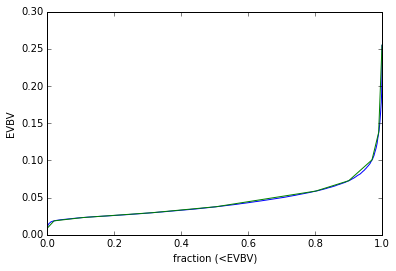

In [15]:
plt.plot(integrated, ebv)
f_ebv = interp1d(integrated[sample_ebv], ebv[sample_ebv])
plt.plot(integrated, f_ebv(integrated))
plt.xlabel('fraction (<EVBV)')
plt.ylabel('EVBV')

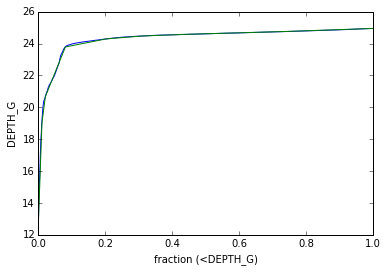

In [16]:
plt.plot(integrated, depth_g)
f_depth_g = interp1d(integrated[sample_depth_g], depth_g[sample_depth_g])
plt.plot(integrated, f_depth_g(integrated))
plt.xlabel('fraction (<DEPTH_G)')
plt.ylabel('DEPTH_G')

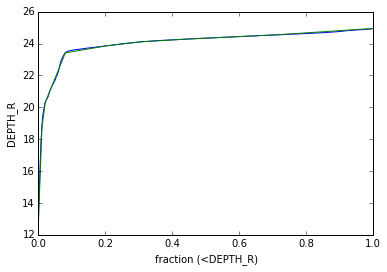

In [17]:
plt.plot(integrated, depth_r)
f_depth_r = interp1d(integrated[sample_depth_r], depth_r[sample_depth_r])
plt.plot(integrated, f_depth_r(integrated))
plt.xlabel('fraction (<DEPTH_R)')
plt.ylabel('DEPTH_R')

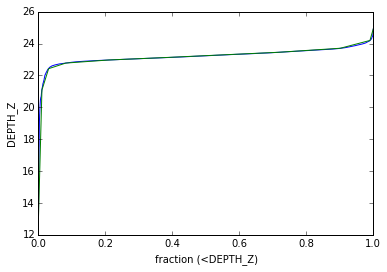

In [18]:
plt.plot(integrated, depth_z)
f_depth_z = interp1d(integrated[sample_depth_z], depth_z[sample_depth_z])
plt.plot(integrated, f_depth_z(integrated))
plt.xlabel('fraction (<DEPTH_Z)')
plt.ylabel('DEPTH_Z')

In [7]:
def sample_depths(n_to_generate):
    points = {}
    points['EBV'] = np.array([ 0.008758,  0.01870997,  0.02296527,  0.02915531,  0.03742408,
                       0.05848215, 0.07245968,  0.10044503,  0.13744652,  0.25484765])
    points['DEPTH_G'] = np.array([ 12.91721153,  18.95317841,  20.64332008,  23.78604698,  24.29093361,
                  24.4658947,   24.55436325,  24.61874771,  24.73129845,  24.94996071])
    points['DEPTH_R'] = np.array([ 12.91556168,  18.6766777,   20.29519463,  23.41814804,  23.85244179,
                  24.10131454,  24.23338318,  24.34066582,  24.53495026,  24.94865227])
    points['DEPTH_Z'] = np.array([ 13.09378147,  21.06531525,  22.42395782,  22.77471352,  22.96237755,
                  23.04913139,  23.43119431,  23.69817734,  24.1913662,   24.92163849])

    fractions = {}
    fractions['EBV'] = np.array([0.0, 0.02, 0.1, 0.3, 0.5, 0.8, 0.9, 0.97, 0.99, 1.0])
    fractions['DEPTH_G'] = np.array([0.0, 0.01, 0.02, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0])
    fractions['DEPTH_R'] = np.array([0.0, 0.01, 0.02, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0])
    fractions['DEPTH_Z'] = np.array([0.0, 0.01, 0.03, 0.08, 0.2, 0.3, 0.7, 0.9, 0.99, 1.0])

    functions = {}
    functions['EBV'] = interp1d(fractions['EBV'], points['EBV'])
    functions['DEPTH_G'] = interp1d(fractions['DEPTH_G'], points['DEPTH_G'])
    functions['DEPTH_R'] = interp1d(fractions['DEPTH_R'], points['DEPTH_R'])
    functions['DEPTH_Z'] = interp1d(fractions['DEPTH_Z'], points['DEPTH_Z'])
    
    fracs = np.random.random(n_to_generate)
    depths = {}
    depths['EBV'] = functions['EBV'](fracs)
    depths['DEPTH_G'] = functions['DEPTH_G'](fracs)
    depths['DEPTH_R'] = functions['DEPTH_R'](fracs)
    depths['DEPTH_Z'] = functions['DEPTH_Z'](fracs)
    return depths

In [8]:
a = sample_depths(5000)

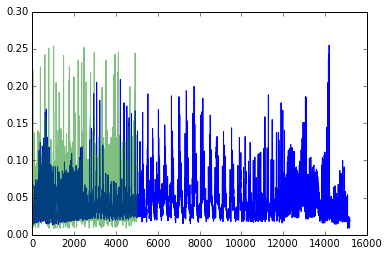

In [9]:
plt.plot(flucmap['EBV'])
plt.plot(a['EBV'], alpha=0.5)

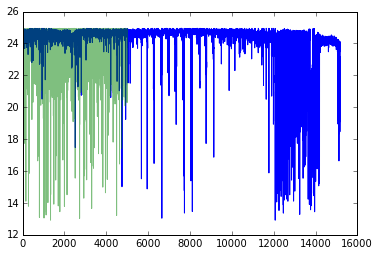

In [10]:
plt.plot(flucmap['DEPTH_G'])
plt.plot(a['DEPTH_G'], alpha=0.5)